# Notebook to find which studies in the meta-analysis found activations within the subcortex

In [130]:
from nipype.interfaces import fsl
from nipype.interfaces.ants import ApplyTransforms
from glob import glob as glob
import sys, os
from os.path import join as opj
import numpy as np
import nilearn
from nilearn import plotting
import pandas as pd
import nibabel as nib
from utils import *
from nighres.registration import embedded_antsreg_multi, apply_coordinate_mappings

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

ModuleNotFoundError: No module named 'nighresjava'

In [2]:
!flirt -in /Users/scotti/Downloads/MNI05-masks/GPi_L_prob_mni_non_linear_young.nii.gz \
-ref /Users/scotti/surfdrive/Projects/interference_in_the_subcortex/Gingerale/template/Colin27_T1_seg_MNI_2x2x2.nii.gz \
-out ~/Downloads/mask_RS.nii.gz -applyxfm

In [57]:
# Define some things
template = '/Users/scotti/surfdrive/Projects/interference_in_the_subcortex/notebooks/MNItemplate/MNI152lin_T1_2mm.nii.gz'

In [122]:
# Find all ATAG masks
masks = glob('/Users/scotti/Downloads/prob_masks_MNI09c/*.nii.gz')
masks

['/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rSTN_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lSTN_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-THA_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rGPi_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lGPi_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lSTR_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rSTR_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rGPe_probseg.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lGPe_probseg.nii.gz']

In [123]:
# Use FSL to resample
for mask in masks:

    aw = fsl.ApplyWarp()
    aw.inputs.in_file = mask
    aw.inputs.ref_file = template
    aw.inputs.out_file = mask.split('.')[0] + '-2mm.nii.gz'
    res = aw.run() 

In [124]:
# Fetch resampled masks
masks = glob('/Users/scotti/Downloads/prob_masks_MNI09c/*-2mm.nii.gz')

In [81]:
# flt = fsl.FLIRT(bins=640, cost_func='mutualinfo')
# flt.inputs.in_file = '/Users/scotti/Downloads/MNI05-masks/THAL_prob_mni_linear_young-2mm.nii.gz'
# flt.inputs.reference = template
# flt.inputs.output_type = "NIFTI_GZ"
# flt.inputs.out_file = '/Users/scotti/Downloads/MNI05-masks/THAL_prob_mni_linear_young-2mm.nii.gz'
# res = flt.run()

In [125]:
masks

['/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-THA_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rSTN_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rGPe_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rSTR_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lGPi_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-rGPi_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lGPe_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lSTR_probseg-2mm.nii.gz',
 '/Users/scotti/Downloads/prob_masks_MNI09c/space-MNI152NLin2009cAsym_label-lSTN_probseg-2mm.nii.gz']

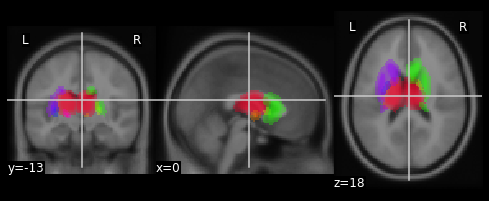

In [127]:
plotting.plot_prob_atlas(masks, bg_img=template)

In [103]:
with open('/Users/scotti/surfdrive/Projects/interference_in_the_subcortex/NiMare/coordinateTxtFiles/Alam-2018-GoNoGo-BoxEasy-NoGo>Go.txt' ,'r') as f:
    lines = f.readlines()

In [104]:
lines = [x.strip() for x in lines] 

In [105]:
lines = [x.rstrip("\n") for x in lines]
lines = [x.rstrip("\t") for x in lines]
lines

['// Reference=MNI',
 '// Alam, 2018: NoGo > Go, Activations (a)',
 '// Subjects=27',
 '46\t-62\t-12',
 '46\t-70\t-4',
 '56\t-56\t-4',
 '52\t-60\t-6',
 '50\t-46\t8',
 '56\t-66\t-4',
 '-46\t-70\t-4',
 '-46\t-82\t0',
 '-44\t-82\t4',
 '-52\t-62\t8',
 '-34\t-86\t6',
 '-36\t-90\t-4',
 '18\t-72\t54',
 '30\t-70\t42',
 '36\t-68\t52',
 '30\t0\t58']

In [99]:
pd.read_csv('/Users/scotti/surfdrive/Projects/interference_in_the_subcortex/NiMare/coordinateTxtFiles/Alam-2018-GoNoGo-BoxEasy-NoGo>Go.txt',sep='\t')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 3


In [107]:
len(glob('/Users/scotti/surfdrive/Projects/interference_in_the_subcortex/NiMare/coordinateTxtFiles/*'))

75